$\textbf{PROGRAMMING ASSIGNMENT}$
---
# Instructions:
---

1. Choose a data from https://archive.ics.uci.edu
2. Perform regression analysis on your chosen dataset

In [9]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

student_performance = fetch_ucirepo(id=320)
X = student_performance.data.features
y = student_performance.data.targets
print(X.columns)
print(y.columns)

features = ['studytime', 'age', 'freetime', 'failures', 'traveltime', 'Medu', 'Fedu','health','absences','Walc','Dalc','goout']
target_column = 'G3'

X = X[features]
y = y[target_column]

X = X.apply(pd.to_numeric)
y = y.apply(pd.to_numeric)

X.dropna(inplace=True)
y.dropna(inplace=True)

print(X.describe())
print(y.describe())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=912)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')
Index(['G1', 'G2', 'G3'], dtype='object')
        studytime         age    freetime    failures  traveltime        Medu  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     1.930663   16.744222    3.180277    0.221880    1.568567    2.514638   
std      0.829510    1.218138    1.051093    0.593235    0.748660    1.134552   
min      1.000000   15.000000    1.000000    0.000000    1.000000    0.000000   
25%      1.000000   16.000000    3.000000    0.000000    1.000000    2.000000   
50%      2.000000   17.000000    3.000000    0.000000    1.000000    2.000000   
75%      2.000000   18.0

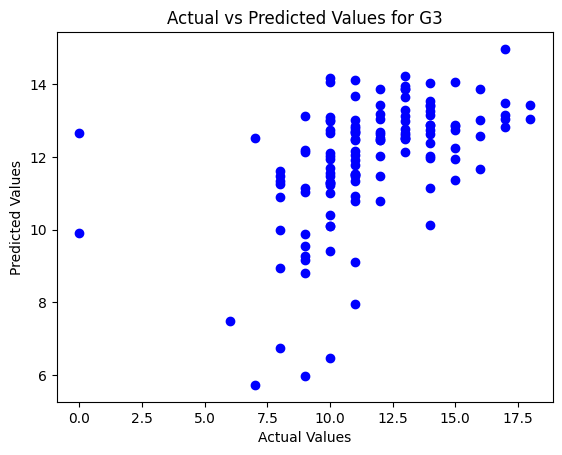

In [10]:
import matplotlib.pyplot as plt

# Plotting the actual versus predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs Predicted Values for G3')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()